In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [125]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [72]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} | {city}")
    except:
        print("Record not found") 
        pass
        

Processing record 1 | upernavik
Processing record 2 | bluff
Processing record 3 | paka
Processing record 4 | mataura
Processing record 5 | barrow
Processing record 6 | kadipaten
Processing record 7 | carnarvon
Record not found
Processing record 8 | laguna
Processing record 9 | rafaela
Processing record 10 | aborlan
Processing record 11 | ghanzi
Processing record 12 | busselton
Processing record 13 | yerbogachen
Processing record 14 | hithadhoo
Processing record 15 | castro
Processing record 16 | esso
Processing record 17 | lucea
Processing record 18 | padang
Processing record 19 | yatou
Processing record 20 | shache
Processing record 21 | portugalete
Processing record 22 | san patricio
Processing record 23 | batagay-alyta
Record not found
Processing record 24 | cape town
Processing record 25 | san cristobal
Processing record 26 | new norfolk
Processing record 27 | clyde river
Processing record 28 | qaanaaq
Processing record 29 | lorengau
Processing record 30 | punta arenas
Processing r

Processing record 242 | namatanai
Processing record 243 | barra
Processing record 244 | inverbervie
Processing record 245 | russell
Processing record 246 | alekseyevsk
Processing record 247 | mar del plata
Processing record 248 | republic
Record not found
Processing record 249 | vostok
Processing record 250 | fairmont
Processing record 251 | fortuna
Processing record 252 | richards bay
Processing record 253 | ninghai
Processing record 254 | grindavik
Processing record 255 | broken hill
Processing record 256 | saint-philippe
Processing record 257 | rawson
Processing record 258 | matara
Processing record 259 | ust-nera
Processing record 260 | atar
Processing record 261 | lubango
Processing record 262 | bereda
Processing record 263 | balvi
Processing record 264 | la lira
Processing record 265 | road town
Processing record 266 | onega
Processing record 267 | tupik
Processing record 268 | mahibadhoo
Processing record 269 | ancud
Processing record 270 | sakaiminato
Processing record 271 | am

Processing record 477 | marathon
Processing record 478 | kefamenanu
Processing record 479 | jalu
Record not found
Processing record 480 | kathu
Processing record 481 | hobbs
Processing record 482 | sola
Processing record 483 | arawa
Processing record 484 | portland
Processing record 485 | houma
Processing record 486 | khartoum
Processing record 487 | varkaus
Processing record 488 | manaure
Processing record 489 | luena
Processing record 490 | camocim
Processing record 491 | poya
Processing record 492 | alofi
Processing record 493 | velizh
Processing record 494 | fecamp
Processing record 495 | rocha
Processing record 496 | eirunepe
Processing record 497 | omsukchan
Processing record 498 | puerto del rosario
Processing record 499 | maputo
Processing record 500 | benjamin constant
Record not found
Processing record 501 | kavaratti
Processing record 502 | manuk mangkaw
Processing record 503 | taitung
Processing record 504 | talnakh
Processing record 505 | freetown
Processing record 506 | j

In [126]:
# Convert Raw Data to DataFrame
weather_df = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}

weather_data = pd.DataFrame(weather_df)
weather_data.head(20)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-14.10,98,98,3.60,GL,1584230400
1,Bluff,-46.6000,168.3333,64.89,53,100,2.84,NZ,1584230400
2,Paka,4.6374,103.4368,78.80,85,82,4.99,MY,1584230400
3,Mataura,-46.1927,168.8643,64.58,68,100,0.09,NZ,1584230400
4,Barrow,71.2906,-156.7887,0.95,85,67,24.07,US,1584230400
5,Kadipaten,-8.1357,113.2158,66.87,85,100,2.44,ID,1584230400
6,Carnarvon,-24.8667,113.6333,77.07,78,21,6.38,AU,1584230400
7,Laguna,38.4210,-121.4238,50.36,74,100,14.16,US,1584230400
8,Rafaela,-31.2503,-61.4867,83.75,56,100,19.71,AR,1584230400
9,Aborlan,9.4352,118.5492,82.94,64,41,2.77,PH,1584230400


In [127]:
# Export the data into a csv
weather_data.to_csv(r'output_data\weather_data.csv')

In [128]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

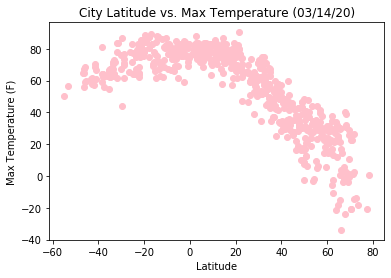

This code plots the relationship between latitude and max temperature for the cities from the API call above. Based on the resulting scatterplot, as latitude increases, max temperature decreases.


In [145]:
# Temperature (F) vs. Latitude
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp, color='pink')
plt.title(f'City Latitude vs. Max Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Temperature (F) vs Latitude')
plt.show()

print("This code plots the relationship between latitude and max temperature for the cities from the API call above. Based on the resulting scatterplot, as latitude increases, max temperature decreases.")

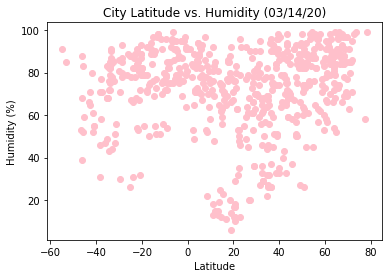

This code plots the relationship between latitude and humidity. Based on the resulting scatterplot, most cities humidity is over 40%. The lowest humidity percentage is found in cities with latitudes around ~20.


In [146]:
# Humidity (%) vs. Latitude
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum, color='pink')
plt.title(f'City Latitude vs. Humidity ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity (%) vs Latitude')
plt.show()

print("This code plots the relationship between latitude and humidity. Based on the resulting scatterplot, most cities humidity is over 40%. The lowest humidity percentage is found in cities with latitudes around ~20.")

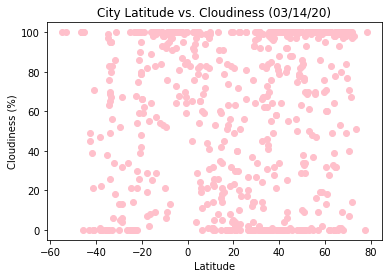

This code plots the relationship between latitude and cloudiness. Based on the resulting scatterplot, there are lots of cities with 100% and 0% cloudiness, regardless of latitude. It appears that 0 latitude has a higher percentage of cloudiness (over 40%).


In [147]:
# Cloudiness (%) vs. Latitude

scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud, color='pink')
plt.title(f'City Latitude vs. Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Cloudiness (%) vs Latitude')
plt.show()

print("This code plots the relationship between latitude and cloudiness. Based on the resulting scatterplot, there are lots of cities with 100% and 0% cloudiness, regardless of latitude. It appears that 0 latitude has a higher percentage of cloudiness (over 40%).")

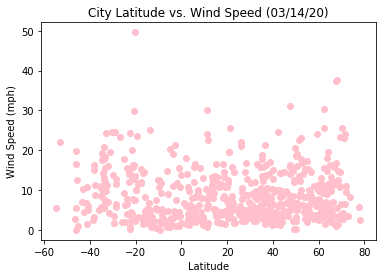

This code plots the relationship between latitude and wind speed. Based on the resulting scatterplot, most cities have wind speed under 30 mph. A city with a latitude of -20 has the highest wind speed (50 mph) and the next highest wind speed (~40 mph) is in a city with ~65 latitude.


In [149]:
# Wind Speed (mph) vs. Latitude

scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp, color='pink')
plt.title(f'City Latitude vs. Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Wind Speed (mph) vs Latitude')
plt.show()

print("This code plots the relationship between latitude and wind speed. Based on the resulting scatterplot, most cities have wind speed under 30 mph. A city with a latitude of -20 has the highest wind speed (50 mph) and the next highest wind speed (~40 mph) is in a city with ~65 latitude.")

In [186]:
# Set up the linear regression formula
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values, color='pink')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [177]:
# Set up the northern and southern hemisphere dataframes

northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-14.10,98,98,3.60,GL,1584230400
2,Paka,4.6374,103.4368,78.80,85,82,4.99,MY,1584230400
4,Barrow,71.2906,-156.7887,0.95,85,67,24.07,US,1584230400
7,Laguna,38.4210,-121.4238,50.36,74,100,14.16,US,1584230400
9,Aborlan,9.4352,118.5492,82.94,64,41,2.77,PH,1584230400


The r-squared is: -0.8995183503038453


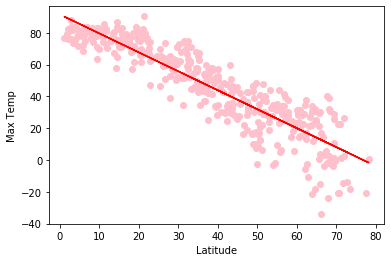

<Figure size 432x288 with 0 Axes>

In [178]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp', (6,30))

plt.savefig('NH Max Temp vs Latitude')

The r-squared is: 0.5647948420879061


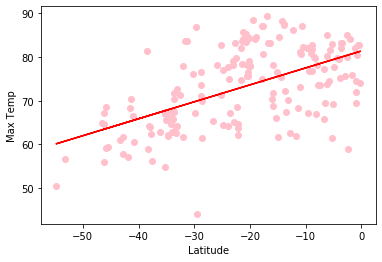

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [179]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('SH Max Temp vs Latitude')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The r-squared is: 0.2992933809673657


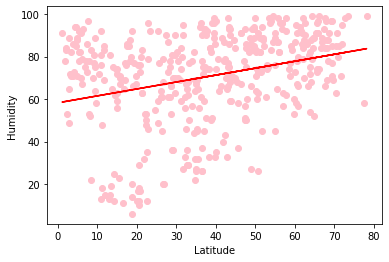

<Figure size 432x288 with 0 Axes>

In [180]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('NH Humidity vs Latitude')

The r-squared is: 0.3722322917005613


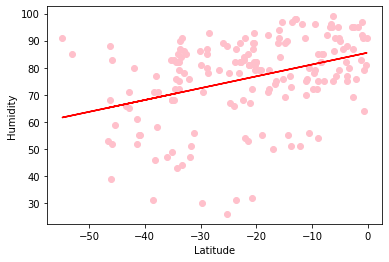

The low r values indicate a weak to no relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [181]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('SH Humidity vs Latitude')

print("The low r values indicate a weak to no relationship between humidity and latitude.")

The r-squared is: 0.19795636712658446


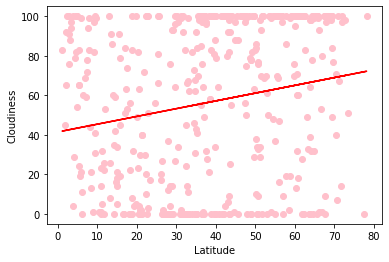

<Figure size 432x288 with 0 Axes>

In [182]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('NH Cloudiness (%) vs Latitude')

The r-squared is: 0.35570270708870627


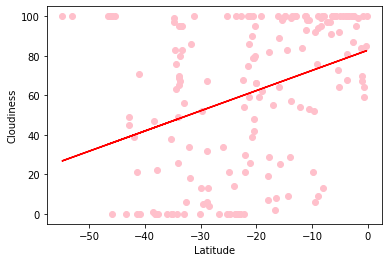

The low r values indicate a weak positive relationship between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [183]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('SH Cloudiness (%) vs Latitude')

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The r-squared is: 0.15401446237841065


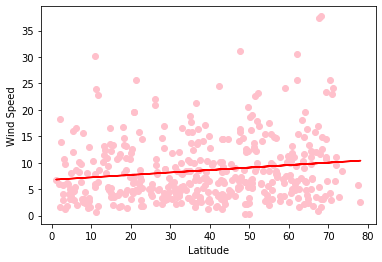

<Figure size 432x288 with 0 Axes>

In [184]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('NH Wind Speed (mph) vs Latitude')

The r-squared is: -0.24080149826971423


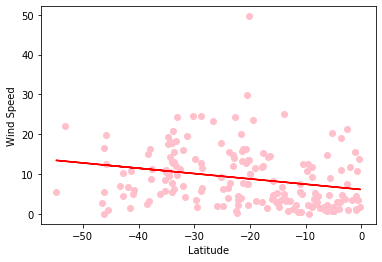

<Figure size 432x288 with 0 Axes>

In [185]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('SH Wind Speed (mph) vs Latitude')